In [1]:
import numpy as np
import random
import pickle
from PIL import Image
import os
import matplotlib.pyplot as plt

In [2]:
def sigmoid(z):
    # z = np.clip(z, -700, 700)
    return 1/(1+np.exp(-z))

In [4]:
class Network(object):
    def __init__(self,sizes): # sizes is a list containing the network.
                              # eg : [784,128,10] means input =784 neurons,
                              #    1st hidden layer 128 neurons, output 10 neurons.
        self.sizes=sizes
        self.num_layers=len(sizes)
        self.weights= [np.random.randn(x,y)*0.001 for x,y in zip(sizes[1:],sizes[:-1])]
        self.biases= [np.zeros((x,1)) for x in sizes[1:]]
        self.encoded = None
    def show(self):
      print(self.num_layers)
      for bias in self.biases:
          print(bias.shape)
      for weight in self.weights:
          print(weight.shape)


    def forwardpropagation(self,a):
        # print(a.shape)
        
        for i,(b,w) in enumerate(zip(self.biases, self.weights)):
            if i+1 == (self.num_layers + 1)/2:
                self.encoded = a
            a= sigmoid(np.dot(w,a)+b) # sig (w.a +b)
            
        return a

    def save_params(self):
        with open('weights.pkl', 'wb') as f:
            pickle.dump(self.weights, f)
        with open('biases.pkl', 'wb') as f:
            pickle.dump(self.biases, f)
    def load_params(self):
        with open('weights.pkl', 'rb') as f:
            self.weights = pickle.load(f)
        with open('biases.pkl', 'rb') as f:
            self.biases = pickle.load(f)
    
    def backpropagation(self,x,y):

        # nothing to do in this 3 lines.

        #nabla_b=dC/db and nabla_w=dC/dw. They are lists of shapes equal to that of bias and weights.
        nabla_b=[np.zeros(b.shape) for b in self.biases]
        nabla_w=[np.zeros(w.shape) for w in self.weights]

        # initially, a0 = input.
        activation=x
        activation_list=[x]

        # step 1 : calculation of delta in last layer
        
        # write the same forward propagation code here but while doing so store the a's.
        for w,b in zip(self.weights,self.biases):
            activation= sigmoid(np.dot(w,activation)+b)
            activation_list.append(activation)

        delta= activation_list[-1] - y   #dC/dz3

        # step 2 : nabla_b and nabla_w relation with delta of last layer

        nabla_b[-1]= delta    #dC/db3  (10,1)
        nabla_w[-1]= delta*activation_list[-2].T #dC/dw3    (10,64)
        
       

        #calculation of delta for hidden layers
        
        for j in range(2,self.num_layers):
            sig_der = activation_list[-j]*(1-activation_list[-j])  #(64,1)
            delta= np.dot(self.weights[-j+1].T,delta)*sig_der   

            # step 4 : nabla_b and nabla_w relation with delta of others layers
            nabla_b[-j]= delta  #"...again, how is dC/db2 and dC/dz2 related..."
            nabla_w[-j]= delta*activation_list[-j-1].T #"...how is dC/dw2 and dC/dz2 related..."

#stop_zone 4 : Run the cell for stop_zone 4.
        return (nabla_b,nabla_w)


    def update_mini_batch(self,mini_batch,lr):
        nabla_b=[np.zeros(b.shape) for b in self.biases]
        nabla_w=[np.zeros(w.shape) for w in self.weights]
        for x,y in mini_batch:
            delta_b,delta_w= self.backpropagation(x,y)
            nabla_b=[nb+ db for nb,db in zip (nabla_b,delta_b)]
            nabla_w=[nw+dw for nw,dw in zip(nabla_w,delta_w)]

        self.weights=[w- lr*nw/len(mini_batch) for w,nw in zip(self.weights,nabla_w)]
        self.biases=[b-lr*nb/len(mini_batch) for b,nb in zip(self.biases,nabla_b)]


    def SGD(self, train_data,epochs,mini_batch_size, lr):
        n_train= len(train_data)
        for i in range(epochs):
            random.shuffle(train_data)
            mini_batches = [train_data[k:k+ mini_batch_size] for k in range(0,n_train,mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch,lr)

            
            print("Epoch {0} completed.".format(i+1))

    



Images shape: (556, 56, 56)
Labels shape: (556,)
train data shape (556, 3136, 1)


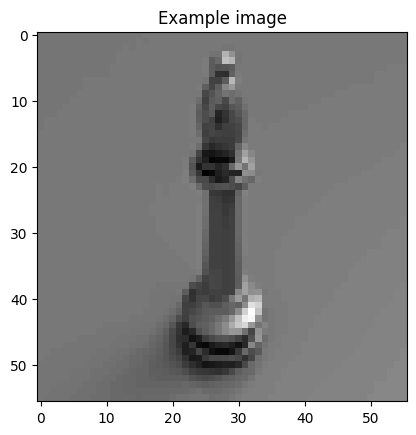

In [5]:

def load_images_from_folder(folder_path):
    images = []
    labels = []  # Assuming your images are organized in subfolders, each representing a class

    for class_label, class_name in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_name)
        
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = Image.open(img_path).convert('L')  # Convert to grayscale
            img = img.resize((56, 56))  # Adjust the size as needed
            img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
            images.append(img_array)
            labels.append(class_label)
            

    return np.array(images), np.array(labels)

# Set the path to your dataset folder
dataset_folder = 'Chessman-image-dataset'

# Load images from the dataset folder
images, labels = load_images_from_folder(dataset_folder)
train_X = images.reshape(-1,images.shape[1]*images.shape[2],1)
# Print the shape of the resulting arrays
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)
print(f"train data shape {train_X.shape}")

#an example from the dataset
example_index = 45
plt.imshow(images[example_index], cmap='gray')
plt.title(f"Example image")
plt.show()


In [6]:
net=Network([train_X.shape[1],400,150,20,150,400,train_X.shape[1]])
train_data = list(zip(train_X,train_X))
net.SGD(train_data=train_data,epochs=10,mini_batch_size=1,lr=0.2)

Epoch 1 completed.
Epoch 2 completed.
Epoch 3 completed.
Epoch 4 completed.
Epoch 5 completed.
Epoch 6 completed.
Epoch 7 completed.
Epoch 8 completed.
Epoch 9 completed.
Epoch 10 completed.


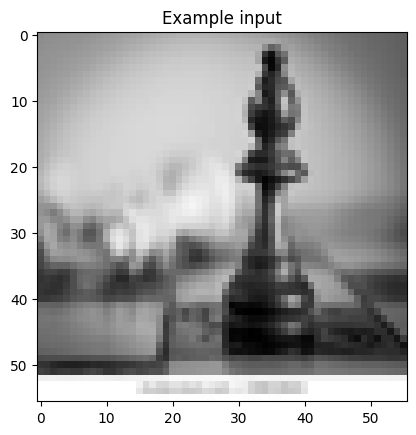

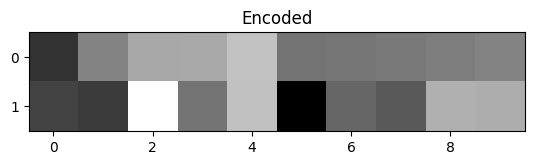

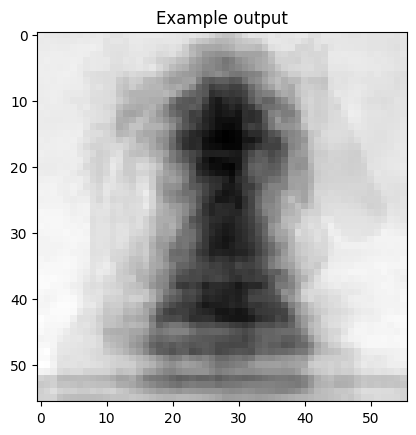

In [7]:
input = train_X[20]
plt.imshow(input.reshape(56,56), cmap='gray')
plt.title(f"Example input")
plt.show()
output = net.forwardpropagation(input)
plt.imshow(net.encoded.reshape(2,10), cmap='gray')
plt.title(f"Encoded")
plt.show()
#for the decoded output
plt.imshow(output.reshape(56,56), cmap='gray')
plt.title(f"Example output")
plt.show()